## <span style="color:blue">Project - Bank Churn Prediction</span>
    - Amarpreet Bassan

### <span style="color:brown">Assumptions<span>

- The machine has [missingno](https://github.com/ResidentMario/missingno) package installed.
- This notebook is running on Python3 kernel.
- The machine has anaconda installed.
- The tensorflow is installed and activated in anaconda environment as per the article [here](https://docs.anaconda.com/anaconda/user-guide/tasks/tensorflow/).
- Tensorflow 2.0 is being used.
- The data file : bank.csv is in teh same folder.

### <span style="color:brown">Reference Used<span>
- [loss functions](https://keras.io/api/losses/)
- [Cross Entropy Functions](https://keras.io/api/losses/probabilistic_losses/#categorical_crossentropy-function)
- [Leaky Relu Functions](https://datascience.stackexchange.com/questions/39042/how-to-use-leakyrelu-as-activation-function-in-sequence-dnn-in-keraswhen-it-per)

### <span style="color:brown">Table Of Contents</span>
1. [Assumptions](#Assumptions)
2. [Import Section](#Import-Section)
3. [Reading Dataset](#Reading-the-Dataset---Section-Begins)
4. [Data Analysis](#Dataset-Analysis---Section-Begins)
   - <b>[Summary of Dataset Analysis](#Summary-of-Dataset-Analysis-Performed)</b>
   - [Feature and Target Variables](#Feature-and-Target-Variables-Selection-Begins)
   - [Observations on Pairplot](#Observations-based-on-pairplot)
    
6. [Splitting the Dataset](#Splitting-the-Dataset)
7. [Standardize the Balance, CreditScore and EstimatedSalary](#Standardize-the-Balance,-CreditScore-and-EstimatedSalary)
8. [Convert the ytrain and ytest to categorical values](#Convert-the-ytrain-and-ytest-to-categorical-values)
9. [Model Creation and Analysis](#Model-Creation-and-Analysis)
   - [Model 1](#Model-1)
       - [GridSearch on KerasClassifier for Model 1 - Hyperparameters Tuning](#GridSearch-on-KerasClassifier-for-Model-1)
       - <b>[Predict Probability for Model 1](#Predict-Probability-for-Model-1)
       - <b>[Prediction Values for Model 1](#Prediction-Values-for-Model-1)
   - [Model 2](#Model-2)
       - [GridSearch on KerasClassifier for Model 2 - Hyperparameters Tuning](#GridSearch-on-KerasClassifier-for-Model-2)
       - <b>[Predict Probability for Model 2](#Predict-Probability-for-Model-2)
       - <b>[Prediction Values for Model 2](#Prediction-Values-for-Model-2)
10. <b>[Considerations for Model Improvement](#Considerations-for-Model-Improvement)
11. <b> [Analysis of the Results from both the models](#Analysis-of-the-Results-from-both-the-models)
    - [Comparison of the Accuracy of the two models](#Comparison-of-the-Accuracy-of-the-two-models)
    - [Classification Report for Model 1](#Classification-Report-for-Model-1)
    - [Classification Report for Model 2](#Classification-Report-for-Model-2)


#### <span style="color:darkcyan">Import Section</span>
[Table of Contents](#Table-Of-Contents)

In [304]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:4f}'.format
import missingno as msno
from sklearn import preprocessing
sns.set(color_codes = True)
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

#### <span style="color:darkcyan">Reading the Dataset - Section Begins</span>
[Table of Contents](#Table-Of-Contents)

In [2]:
#we create the analytics base table as follows :
abt = pd.read_csv('bank.csv')

In [3]:
#create a copy of the abt for preparing the data for modelling.

wdf = abt.copy()

In [4]:
wdf.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000000,1,1,1,101348.880000,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860000,1,0,1,112542.580000,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800000,3,1,0,113931.570000,1
3,4,15701354,Boni,699,France,Female,39,1,0.000000,2,0,0,93826.630000,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820000,1,1,1,79084.100000,0


#### <span style="color:darkcyan">Reading the Dataset - Section Ends</span>
[Table of Contents](#Table-Of-Contents)

#### <span style="color:darkcyan">Dataset Analysis - Section Begins</span>
[Table of Contents](#Table-Of-Contents)

#### <span style="color:darkcyan">Summary of Dataset Analysis Performed</span>
[Table of Contents](#Table-Of-Contents)
 - Identified the Target and Feature Variables.
 - Dropped the Rownumber, Customerid and Surname column.
 - Converted the Geography, Gender to Category type.
 - Changed the NumOfProducts column to 2 bins.
 - Converted the Age to 5 bins.
 - Converted HasCrCard and IsActiveMember to category type.

In [5]:
# we will look at the initial few rows of the dataframe.
wdf.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000000,1,1,1,101348.880000,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860000,1,0,1,112542.580000,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800000,3,1,0,113931.570000,1
3,4,15701354,Boni,699,France,Female,39,1,0.000000,2,0,0,93826.630000,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820000,1,1,1,79084.100000,0


In [7]:
#we can drop the RowNumber and CustomerId since they are unique for every row.
wdf.drop(['RowNumber', 'CustomerId'], axis = 1, inplace = True)

In [8]:
wdf.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.000000,1,1,1,101348.880000,1
1,Hill,608,Spain,Female,41,1,83807.860000,1,0,1,112542.580000,0
2,Onio,502,France,Female,42,8,159660.800000,3,1,0,113931.570000,1
3,Boni,699,France,Female,39,1,0.000000,2,0,0,93826.630000,0
4,Mitchell,850,Spain,Female,43,2,125510.820000,1,1,1,79084.100000,0


In [9]:
#analyzing the data types of each columns.
wdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          10000 non-null  object 
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [14]:
#let us look at the Geography column.
wdf.Geography.value_counts()

#Observation :
#a. we have the three values - France, Germany, Spain

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [13]:
#let us look at the Gender columns.
wdf.Gender.value_counts()

#Observations:
#a. The two genders are nearly equally distributed.

Male      5457
Female    4543
Name: Gender, dtype: int64

In [17]:
#Convert Gender into categories.
wdf.Gender = wdf.Gender.astype('category')

In [18]:
#Convert the Geography column to category.
wdf.Geography = wdf.Geography.astype('category')

In [19]:
wdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Surname          10000 non-null  object  
 1   CreditScore      10000 non-null  int64   
 2   Geography        10000 non-null  category
 3   Gender           10000 non-null  category
 4   Age              10000 non-null  int64   
 5   Tenure           10000 non-null  int64   
 6   Balance          10000 non-null  float64 
 7   NumOfProducts    10000 non-null  int64   
 8   HasCrCard        10000 non-null  int64   
 9   IsActiveMember   10000 non-null  int64   
 10  EstimatedSalary  10000 non-null  float64 
 11  Exited           10000 non-null  int64   
dtypes: category(2), float64(2), int64(7), object(1)
memory usage: 801.1+ KB


In [20]:
#lets check the value counts of surname
wdf.Surname.value_counts()

Smith      32
Scott      29
Martin     29
Walker     28
Brown      26
           ..
Highett     1
Tinline     1
Buckner     1
Harrell     1
Hess        1
Name: Surname, Length: 2932, dtype: int64

In [21]:
#I can remove the surname column too.
wdf.drop(['Surname'], axis = 1, inplace = True)

In [22]:
wdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  category
 2   Gender           10000 non-null  category
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  int64   
 8   IsActiveMember   10000 non-null  int64   
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  int64   
dtypes: category(2), float64(2), int64(7)
memory usage: 723.0 KB


In [23]:
wdf.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000000,1,1,1,101348.880000,1
1,608,Spain,Female,41,1,83807.860000,1,0,1,112542.580000,0
2,502,France,Female,42,8,159660.800000,3,1,0,113931.570000,1
3,699,France,Female,39,1,0.000000,2,0,0,93826.630000,0
4,850,Spain,Female,43,2,125510.820000,1,1,1,79084.100000,0


##### <span style="color:darkcyan">Feature and Target Variables Selection Begins</span>
[Table of Contents](#Table-Of-Contents)

In [27]:
#we will separate the columns into x and y
#y is the target variable - exited or not exited
x = wdf[wdf.columns.difference(['Exited'])]
y = wdf.Exited

##### <span style="color:darkcyan">Feature and Target Variables Selection Ends</span>
[Table of Contents](#Table-Of-Contents)

In [28]:
#examine the head of x
x.head()

,Age,Balance,CreditScore,EstimatedSalary,Gender,Geography,HasCrCard,IsActiveMember,NumOfProducts,Tenure
0,42,0.000000,619,101348.880000,Female,France,1,1,1,2
1,41,83807.860000,608,112542.580000,Female,Spain,0,1,1,1
2,42,159660.800000,502,113931.570000,Female,France,1,0,3,8
3,39,0.000000,699,93826.630000,Female,France,0,0,2,1
4,43,125510.820000,850,79084.100000,Female,Spain,1,1,1,2


In [29]:
#examine the target variable head
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

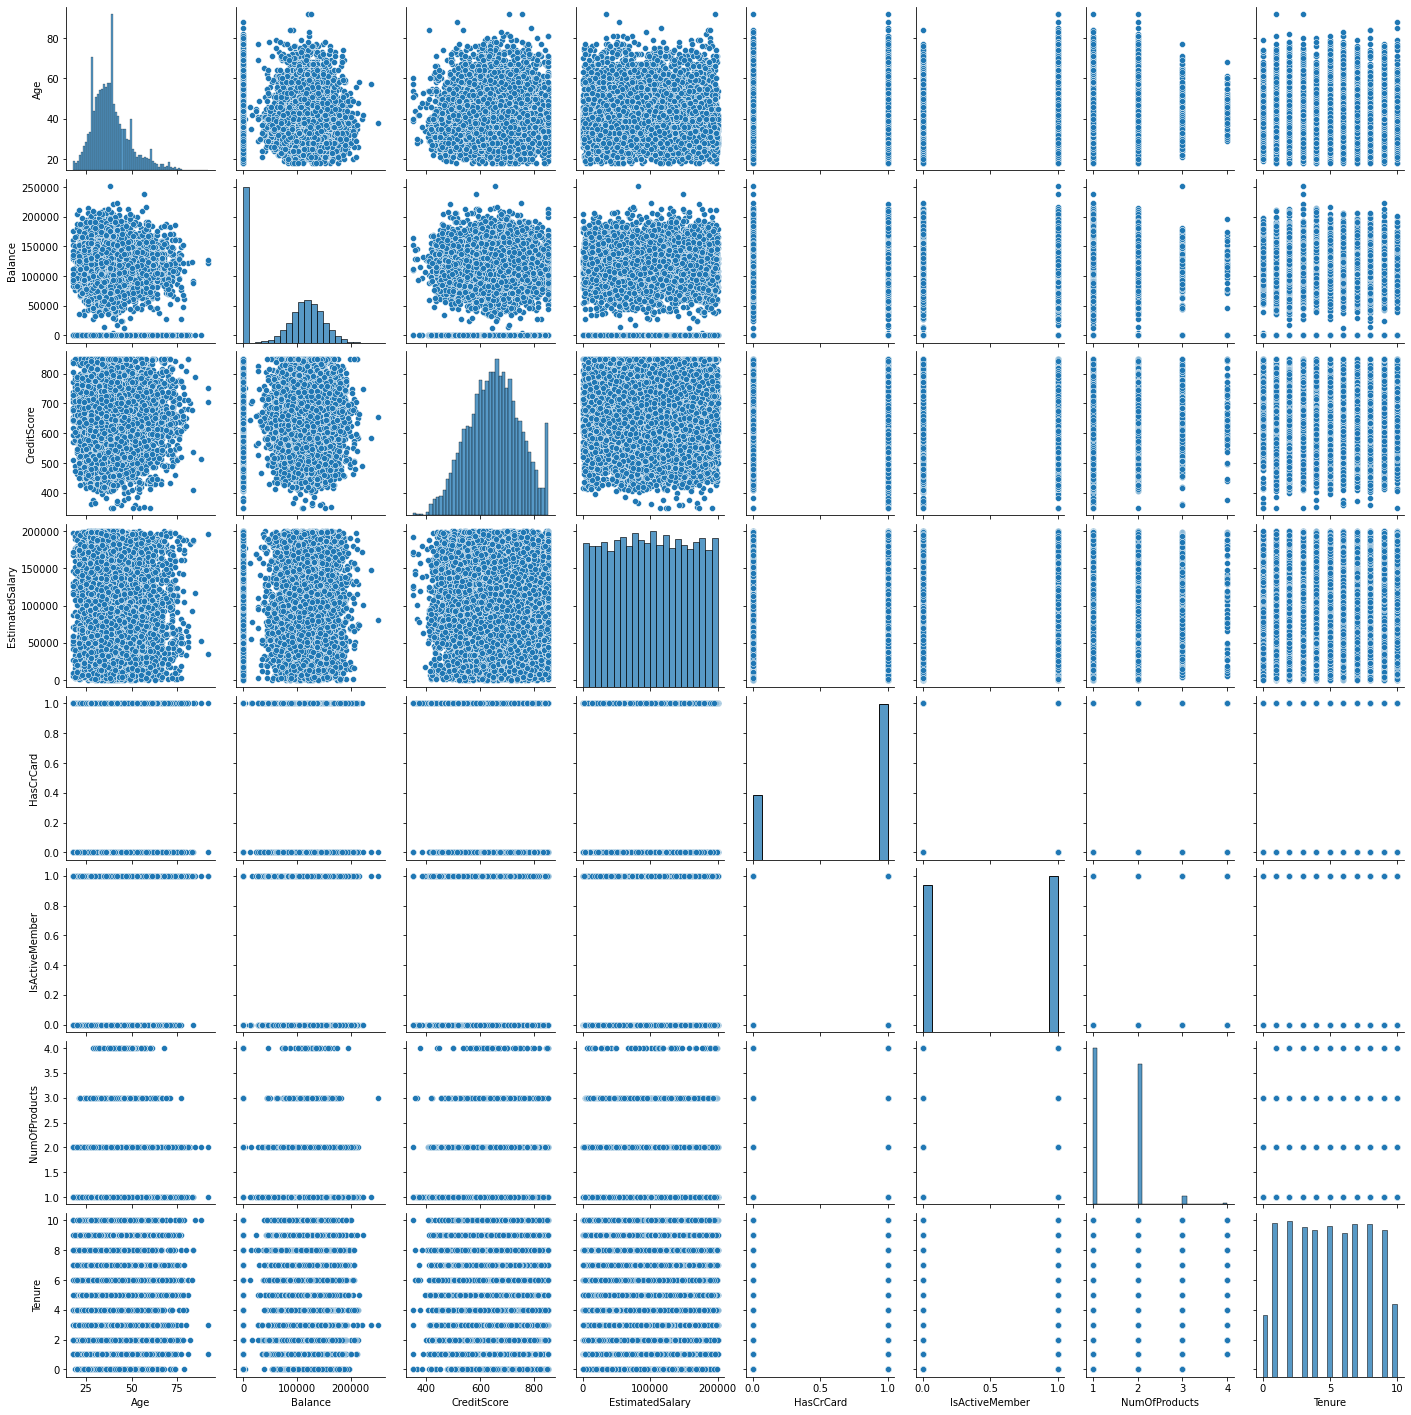

In [30]:
#lets get a pairplot 
sns.pairplot(x)

##### <span style="color:darkcyan">Observations based on pairplot</span>
[Table of Contents](#Table-Of-Contents)
- Age is normally distributed with slightly right skew
- Balance has a outlier of 0 balance but the remaining data is normally distributed.
- Credit score has the normal distribution with a slightly more number of people in the end score.
- NumProducts distribution is more of less even with 1, 2 but the distribution of 3 is very low.

In [36]:
#lets look at the number of people who has zero balance.
x[x.Balance == 0].count()

Age                3617
Balance            3617
CreditScore        3617
EstimatedSalary    3617
Gender             3617
Geography          3617
HasCrCard          3617
IsActiveMember     3617
NumOfProducts      3617
Tenure             3617
dtype: int64

In [66]:
#since almost a third of the entry has zero balance , we cannot ignore this value.
#lets look at the max Number of products


D:\anaconda_installation\envs\tf\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NumOfProducts', ylabel='Density'>

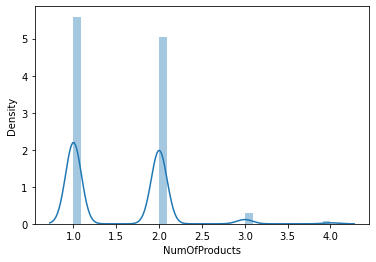

In [68]:
#let us look at the distribution of the numberofproducts
sns.distplot(x['NumOfProducts'])

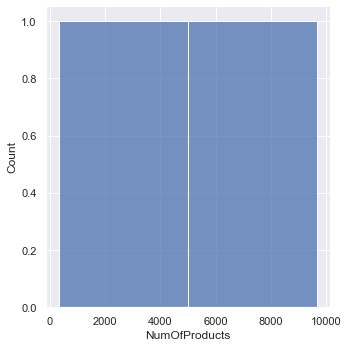

In [78]:
#we will try to rebucketize this 
sns.displot(x['NumOfProducts'].value_counts(bins = 2, normalize = False))

In [83]:
#seems like we can segregate the number of products into two categories.
# dividing the number of products into the categories, 
x.NumOfProducts.value_counts(bins = 2)


(0.996, 2.5]    9674
(2.5, 4.0]       326
Name: NumOfProducts, dtype: int64

In [131]:
#lets manullay define the bins and see the distribution
x['NumOfProductsbin'] = pd.cut(x['NumOfProducts'], [0, 1])

In [133]:
x['NumOfProductsbin'].value_counts(dropna = False)

(0.0, 1.0]    5084
NaN           4916
Name: NumOfProductsbin, dtype: int64

In [129]:
#dividint them into 2 categories will help, persisting this data into the dataframe.
#also naming the categories as 1, 2.
bin_labels = [1, 2]
x['catnumproducts'] = pd.cut(x['NumOfProducts'], bins = [0, 1, 2], labels = bin_labels)

In [130]:
x['catnumproducts'].value_counts(dropna = False)

1      5084
2      4590
NaN     326
Name: catnumproducts, dtype: int64

In [135]:
#we will relabel all the nan to 2
x['catnumproducts'].fillna(2, inplace = True)

In [138]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Age               10000 non-null  int64   
 1   Balance           10000 non-null  float64 
 2   CreditScore       10000 non-null  int64   
 3   EstimatedSalary   10000 non-null  float64 
 4   Gender            10000 non-null  category
 5   Geography         10000 non-null  category
 6   HasCrCard         10000 non-null  int64   
 7   IsActiveMember    10000 non-null  int64   
 8   NumOfProducts     10000 non-null  int64   
 9   Tenure            10000 non-null  int64   
 10  catnumproducts    10000 non-null  category
 11  NumOfProductsbin  5084 non-null   category
dtypes: category(4), float64(2), int64(6)
memory usage: 664.6 KB


In [141]:
#let us create another dataframe with numofproducts eliminated
xproductsbinned = x[x.columns.difference(['NumOfProducts', 'NumOfProductsbin'])]
xproductsbinned.head()
#sns.pairplot(xproductsbinned)

,Age,Balance,CreditScore,EstimatedSalary,Gender,Geography,HasCrCard,IsActiveMember,Tenure,catnumproducts
0,42,0.000000,619,101348.880000,Female,France,1,1,2,1
1,41,83807.860000,608,112542.580000,Female,Spain,0,1,1,1
2,42,159660.800000,502,113931.570000,Female,France,1,0,8,2
3,39,0.000000,699,93826.630000,Female,France,0,0,1,2
4,43,125510.820000,850,79084.100000,Female,Spain,1,1,2,1


In [142]:
#covnert the tenure to categorical column
xproductsbinned['Tenure'] = xproductsbinned['Tenure'].astype('category')

D:\anaconda_installation\envs\tf\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [143]:
#lets look at the age column and convert it into categories as well.
xmodel = xproductsbinned.copy()

In [155]:
print(xmodel['Age'].min())
print(xmodel['Age'].max())

18
92


In [181]:
bins_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8]
xmodel['catage'] = pd.cut(xmodel['Age'], bins = [10, 30,  35, 40,  50, 60, 70, 80, 90, 95], labels = bins_labels)
xmodel['catage'].value_counts(dropna = False)

3    2320
2    2266
1    2185
0    1968
4     797
5     331
6     121
7      10
8       2
Name: catage, dtype: int64

In [183]:
#combining all the values from 4 onto its group
xmodel['catage'] = xmodel['catage'].replace({5:4, 6: 4, 7:4, 8:4})

In [184]:
xmodel['catage'].value_counts()

3    2320
2    2266
1    2185
0    1968
4    1261
Name: catage, dtype: int64

In [185]:
#convert the catage column to categorical 
xmodel['catage'] = xmodel['catage'].astype('category')

In [186]:
#we also convert hascrcard and isactive member to category
xmodel['HasCrCard'] = xmodel['HasCrCard'].astype('category')
xmodel['IsActiveMember'] = xmodel['IsActiveMember'].astype('category') 

In [228]:
#coming to the balance field now.
print(xmodel['Balance'].min())
print(xmodel['Balance'].max())
print(xmodel['Balance'].count())
xmodel['Balance'].value_counts(bins = [0, 50000, 110000, 135000,  300000], dropna = False)

0.0
250898.09
10000


(-0.001, 50000.0]       3692
(50000.0, 110000.0]     2295
(110000.0, 135000.0]    2106
(135000.0, 300000.0]    1907
Name: Balance, dtype: int64

#### <span style="color:darkcyan">Dataset Analysis - Section Ends</span>
[Table of Contents](#Table-Of-Contents)

In [234]:
#remove Age column, convert gender and geography to category code
xmodel.drop(['Age'], axis = 1, inplace = True)

In [235]:
xmodel['Gendercat'] = xmodel.Gender.cat.codes

In [237]:
xmodel['Geographycat'] = xmodel.Geography.cat.codes

In [240]:
#convert Gendercat and Geographycat to category column
xmodel['Gendercat'] = xmodel['Gendercat'].astype('category')
xmodel['Geographycat'] = xmodel['Geographycat'].astype('category')

In [241]:
xmodel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Balance          10000 non-null  float64 
 1   CreditScore      10000 non-null  int64   
 2   EstimatedSalary  10000 non-null  float64 
 3   Gender           10000 non-null  category
 4   Geography        10000 non-null  category
 5   HasCrCard        10000 non-null  category
 6   IsActiveMember   10000 non-null  category
 7   Tenure           10000 non-null  category
 8   catnumproducts   10000 non-null  category
 9   catage           10000 non-null  category
 10  Gendercat        10000 non-null  category
 11  Geographycat     10000 non-null  category
dtypes: category(9), float64(2), int64(1)
memory usage: 323.7 KB


#### <span style="color:darkcyan">Dataset Analysis - Section Ends</span>
[Table of Contents](#Table-Of-Contents)

#### <span style="color:darkcyan">Splitting the Dataset</span>
[Table of Contents](#Table-Of-Contents)

In [243]:
#split the data

x_train, x_test, y_train, y_test = train_test_split(xmodel, y, test_size = 0.33, random_state = 42)

In [244]:
#let us examine the x_train data set
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6700 entries, 8371 to 7270
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Balance          6700 non-null   float64 
 1   CreditScore      6700 non-null   int64   
 2   EstimatedSalary  6700 non-null   float64 
 3   Gender           6700 non-null   category
 4   Geography        6700 non-null   category
 5   HasCrCard        6700 non-null   category
 6   IsActiveMember   6700 non-null   category
 7   Tenure           6700 non-null   category
 8   catnumproducts   6700 non-null   category
 9   catage           6700 non-null   category
 10  Gendercat        6700 non-null   category
 11  Geographycat     6700 non-null   category
dtypes: category(9), float64(2), int64(1)
memory usage: 269.5 KB


In [245]:
x_train.head()

,Balance,CreditScore,EstimatedSalary,Gender,Geography,HasCrCard,IsActiveMember,Tenure,catnumproducts,catage,Gendercat,Geographycat
8371,106059.400000,813,187976.880000,Female,Germany,0,0,5,1,0,0,1
5027,73179.340000,681,25292.530000,Male,Germany,1,1,8,2,2,1,1
9234,120688.610000,642,24770.220000,Male,Germany,1,0,4,1,3,1,1
3944,117989.760000,612,54129.860000,Female,France,1,1,8,1,1,0,0
6862,0.000000,586,6975.020000,Male,France,1,0,9,1,1,1,0


#### <span style="color:darkcyan">Standardize the Balance, CreditScore and EstimatedSalary</span>
[Table of Contents](#Table-Of-Contents)

In [251]:
#create standard scaler for Balance, creditscore and esitmated salary column
cols_for_standardization = ['Balance', 'CreditScore', 'EstimatedSalary']
stscaler = StandardScaler()

In [252]:
stscaler.fit(x_train[cols_for_standardization])


StandardScaler()

In [314]:
scaled_columns = stscaler.transform(x_train[cols_for_standardization])

In [255]:
scaled_columns = pd.DataFrame(scaled_columns, columns = cols_for_standardization)

In [256]:
scaled_columns

,Balance,CreditScore,EstimatedSalary
0,0.478618,1.675888,1.504937
1,-0.046891,0.303207,-1.311771
2,0.712431,-0.102358,-1.320815
3,0.669297,-0.414331,-0.812483
4,-1.216488,-0.684708,-1.628920
...,...,...,...
6695,-0.102296,1.207928,-0.548425
6696,-1.216488,0.313606,-1.737453
6697,-1.216488,0.864758,-0.152991
6698,1.823844,0.157619,-0.061436


In [260]:
x_train['Balance'] = scaled_columns['Balance'].values
x_train['CreditScore'] = scaled_columns['CreditScore'].values
x_train['EstimatedSalary'] = scaled_columns['EstimatedSalary'].values

D:\anaconda_installation\envs\tf\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\anaconda_installation\envs\tf\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\anaconda_installation\envs\tf\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [261]:
x_train.head()

,Balance,CreditScore,EstimatedSalary,Gender,Geography,HasCrCard,IsActiveMember,Tenure,catnumproducts,catage,Gendercat,Geographycat
8371,0.478618,1.675888,1.504937,Female,Germany,0,0,5,1,0,0,1
5027,-0.046891,0.303207,-1.311771,Male,Germany,1,1,8,2,2,1,1
9234,0.712431,-0.102358,-1.320815,Male,Germany,1,0,4,1,3,1,1
3944,0.669297,-0.414331,-0.812483,Female,France,1,1,8,1,1,0,0
6862,-1.216488,-0.684708,-1.628920,Male,France,1,0,9,1,1,1,0


In [264]:
#remove the Gender and Geography column
x_train.drop(['Gender', 'Geography'],axis = 1,  inplace = True)

D:\anaconda_installation\envs\tf\lib\site-packages\pandas\core\frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [265]:
x_train.head()

,Balance,CreditScore,EstimatedSalary,HasCrCard,IsActiveMember,Tenure,catnumproducts,catage,Gendercat,Geographycat
8371,0.478618,1.675888,1.504937,0,0,5,1,0,0,1
5027,-0.046891,0.303207,-1.311771,1,1,8,2,2,1,1
9234,0.712431,-0.102358,-1.320815,1,0,4,1,3,1,1
3944,0.669297,-0.414331,-0.812483,1,1,8,1,1,0,0
6862,-1.216488,-0.684708,-1.628920,1,0,9,1,1,1,0


In [284]:
x_train.rename(columns = {'catage':'Age', 'Gendercat':'Gender', 'Geographycat':'Geography', 'catnumproducts':'NumOfProducts'}, inplace = True)

In [285]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6700 entries, 8371 to 7270
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Balance          6700 non-null   float64 
 1   CreditScore      6700 non-null   float64 
 2   EstimatedSalary  6700 non-null   float64 
 3   HasCrCard        6700 non-null   category
 4   IsActiveMember   6700 non-null   category
 5   Tenure           6700 non-null   category
 6   NumOfProducts    6700 non-null   category
 7   Age              6700 non-null   category
 8   Gender           6700 non-null   category
 9   Geography        6700 non-null   category
dtypes: category(7), float64(3)
memory usage: 576.2 KB


In [287]:
x_train.columns

Index(['Balance', 'CreditScore', 'EstimatedSalary', 'HasCrCard',
       'IsActiveMember', 'Tenure', 'NumOfProducts', 'Age', 'Gender',
       'Geography'],
      dtype='object')

In [289]:
xtrain = x_train[['Balance', 'CreditScore', 'EstimatedSalary', 'HasCrCard',
       'IsActiveMember', 'Tenure', 'NumOfProducts', 'Age', 'Gender',
       'Geography']].values

In [286]:
y_train.value_counts()

0    5306
1    1394
Name: Exited, dtype: int64

#### <span style="color:darkcyan">Convert the ytrain and ytest to categorical values</span>
[Table of Contents](#Table-Of-Contents)

In [273]:
ytrain = keras.utils.to_categorical(y_train, 2)
ytest = keras.utils.to_categorical(y_test, 2)

In [279]:
x_train.shape

(6700, 10)

In [280]:
x_train.columns

Index(['Balance', 'CreditScore', 'EstimatedSalary', 'HasCrCard',
       'IsActiveMember', 'Tenure', 'catnumproducts', 'catage', 'Gendercat',
       'Geographycat'],
      dtype='object')

#### <span style="color:darkcyan">Model Creation and Analysis</span>
[Table of Contents](#Table-Of-Contents)
We will use the technique displayed in following [article](https://chrisalbon.com/deep_learning/keras/tuning_neural_network_hyperparameters/)

#### <span style="color:darkcyan">Model 1</span>
[Table of Contents](#Table-Of-Contents)

In [298]:
# Create function returning a compiled network
def create_network(optimizer='adam'):
    
    # Start neural network
    network = Sequential()

    # Add fully connected layer with a ReLU activation function
    network.add(Dense(64, activation='relu'))

    # Add fully connected layer with a ReLU activation function
    network.add(Dense(32, activation='relu'))

    # Add fully connected layer with a sigmoid activation function
    network.add(Dense(2, activation='softmax'))

    # Compile neural network
    network.compile(loss='binary_crossentropy', # Cross-entropy
                    optimizer=optimizer, # Optimizer
                    metrics=['accuracy']) # Accuracy performance metric
    
    # Return compiled network
    return network

In [301]:
# Wrap Keras model so it can be used by scikit-learn
neural_network = KerasClassifier(build_fn=create_network, verbose=1)

In [302]:
# Create hyperparameter space
epochs = [20, 30]
batches = [256, 512]
optimizers = ['rmsprop', 'adam']

# Create hyperparameter options
hyperparameters = dict(optimizer=optimizers, epochs=epochs, batch_size=batches)

#### <span style="color:darkcyan">GridSearch on KerasClassifier for Model 1</span>
[Table of Contents](#Table-Of-Contents)

In [305]:
# Create grid search
grid = GridSearchCV(estimator=neural_network, cv=3, param_grid=hyperparameters)

# Fit grid search
grid_result = grid.fit(xtrain, ytrain)

Train on 4466 samples
Epoch 1/20
4466/4466 [==============================] - 1s 151us/sample - loss: 0.4778 - accuracy: 0.7991
Epoch 2/20
4466/4466 [==============================] - 0s 7us/sample - loss: 0.4337 - accuracy: 0.8112
Epoch 3/20
4466/4466 [==============================] - 0s 8us/sample - loss: 0.4202 - accuracy: 0.8146
Epoch 4/20
4466/4466 [==============================] - 0s 8us/sample - loss: 0.4147 - accuracy: 0.8215
Epoch 5/20
4466/4466 [==============================] - 0s 8us/sample - loss: 0.4076 - accuracy: 0.8238
Epoch 6/20
4466/4466 [==============================] - 0s 8us/sample - loss: 0.4070 - accuracy: 0.8258
Epoch 7/20
4466/4466 [==============================] - 0s 8us/sample - loss: 0.4050 - accuracy: 0.8260
Epoch 8/20
4466/4466 [==============================] - 0s 7us/sample - loss: 0.4032 - accuracy: 0.8312
Epoch 9/20
4466/4466 [==============================] - 0s 8us/sample - loss: 0.4014 - accuracy: 0.8318
Epoch 10/20
4466/4466 [=================

2234/2234 [==============================] - 0s 48us/sample - loss: 0.4455 - accuracy: 0.7995
Train on 4467 samples
Epoch 1/30
4467/4467 [==============================] - 1s 156us/sample - loss: 0.5195 - accuracy: 0.7696
Epoch 2/30
4467/4467 [==============================] - 0s 8us/sample - loss: 0.4658 - accuracy: 0.7876
Epoch 3/30
4467/4467 [==============================] - 0s 8us/sample - loss: 0.4474 - accuracy: 0.7958
Epoch 4/30
4467/4467 [==============================] - 0s 8us/sample - loss: 0.4427 - accuracy: 0.8008
Epoch 5/30
4467/4467 [==============================] - 0s 8us/sample - loss: 0.4373 - accuracy: 0.8034
Epoch 6/30
4467/4467 [==============================] - 0s 8us/sample - loss: 0.4357 - accuracy: 0.8084
Epoch 7/30
4467/4467 [==============================] - 0s 8us/sample - loss: 0.4315 - accuracy: 0.8102
Epoch 8/30
4467/4467 [==============================] - 0s 7us/sample - loss: 0.4308 - accuracy: 0.8090
Epoch 9/30
4467/4467 [============================

Epoch 15/30
4466/4466 [==============================] - 0s 11us/sample - loss: 0.3927 - accuracy: 0.8359
Epoch 16/30
4466/4466 [==============================] - 0s 11us/sample - loss: 0.3916 - accuracy: 0.8370
Epoch 17/30
4466/4466 [==============================] - 0s 13us/sample - loss: 0.3900 - accuracy: 0.8377
Epoch 18/30
4466/4466 [==============================] - 0s 14us/sample - loss: 0.3895 - accuracy: 0.8361
Epoch 19/30
4466/4466 [==============================] - 0s 11us/sample - loss: 0.3888 - accuracy: 0.8379
Epoch 20/30
4466/4466 [==============================] - 0s 10us/sample - loss: 0.3872 - accuracy: 0.8379
Epoch 21/30
4466/4466 [==============================] - 0s 10us/sample - loss: 0.3866 - accuracy: 0.8336
Epoch 22/30
4466/4466 [==============================] - 0s 9us/sample - loss: 0.3872 - accuracy: 0.8343
Epoch 23/30
4466/4466 [==============================] - 0s 9us/sample - loss: 0.3871 - accuracy: 0.8343
Epoch 24/30
4466/4466 [=========================

4466/4466 [==============================] - 0s 5us/sample - loss: 0.4011 - accuracy: 0.8262
Epoch 14/20
4466/4466 [==============================] - 0s 5us/sample - loss: 0.3985 - accuracy: 0.8294
Epoch 15/20
4466/4466 [==============================] - 0s 7us/sample - loss: 0.3973 - accuracy: 0.8292
Epoch 16/20
4466/4466 [==============================] - 0s 6us/sample - loss: 0.3959 - accuracy: 0.8334
Epoch 17/20
4466/4466 [==============================] - 0s 5us/sample - loss: 0.3949 - accuracy: 0.8309
Epoch 18/20
4466/4466 [==============================] - 0s 5us/sample - loss: 0.3937 - accuracy: 0.8325
Epoch 19/20
4466/4466 [==============================] - 0s 5us/sample - loss: 0.3926 - accuracy: 0.8330
Epoch 20/20
2234/2234 [==============================] - 0s 61us/sample - loss: 0.4458 - accuracy: 0.8053
Train on 4467 samples
Epoch 1/20
4467/4467 [==============================] - 1s 124us/sample - loss: 0.5167 - accuracy: 0.7817
Epoch 2/20
4467/4467 [=====================

4466/4466 [==============================] - 0s 5us/sample - loss: 0.3983 - accuracy: 0.8280
Epoch 13/30
4466/4466 [==============================] - 0s 6us/sample - loss: 0.3978 - accuracy: 0.8280
Epoch 14/30
4466/4466 [==============================] - 0s 6us/sample - loss: 0.3956 - accuracy: 0.8294
Epoch 15/30
4466/4466 [==============================] - 0s 5us/sample - loss: 0.3949 - accuracy: 0.8300
Epoch 16/30
4466/4466 [==============================] - 0s 5us/sample - loss: 0.3936 - accuracy: 0.8296
Epoch 17/30
4466/4466 [==============================] - 0s 5us/sample - loss: 0.3931 - accuracy: 0.8287
Epoch 18/30
4466/4466 [==============================] - 0s 6us/sample - loss: 0.3916 - accuracy: 0.8300
Epoch 19/30
4466/4466 [==============================] - 0s 6us/sample - loss: 0.3922 - accuracy: 0.8296
Epoch 20/30
4466/4466 [==============================] - 0s 6us/sample - loss: 0.3898 - accuracy: 0.8312
Epoch 21/30
4466/4466 [==============================] - 0s 6us/sam

4467/4467 [==============================] - 0s 11us/sample - loss: 0.4028 - accuracy: 0.8303
Epoch 29/30
4467/4467 [==============================] - 0s 5us/sample - loss: 0.4011 - accuracy: 0.8285
Epoch 30/30
2233/2233 [==============================] - 0s 65us/sample - loss: 0.4130 - accuracy: 0.8200
Train on 6700 samples
Epoch 1/20
6700/6700 [==============================] - 1s 103us/sample - loss: 0.5473 - accuracy: 0.7527
Epoch 2/20
6700/6700 [==============================] - 0s 7us/sample - loss: 0.4502 - accuracy: 0.7997
Epoch 3/20
6700/6700 [==============================] - 0s 7us/sample - loss: 0.4327 - accuracy: 0.8078
Epoch 4/20
6700/6700 [==============================] - 0s 7us/sample - loss: 0.4269 - accuracy: 0.8119
Epoch 5/20
6700/6700 [==============================] - 0s 7us/sample - loss: 0.4223 - accuracy: 0.8172
Epoch 6/20
6700/6700 [==============================] - 0s 8us/sample - loss: 0.4205 - accuracy: 0.8170
Epoch 7/20
6700/6700 [=========================

In [312]:
# View hyperparameters of best neural network
print(grid_result.best_params_)
print(grid_result.best_score_)

{'batch_size': 256, 'epochs': 20, 'optimizer': 'rmsprop'}
0.8235844771067301


In [316]:
#we will now apply the transformation for the test columns 
scaled_columns_test = stscaler.transform(x_test[cols_for_standardization])
scaled_columns_test = pd.DataFrame(scaled_columns_test, columns = cols_for_standardization)

x_test['Balance'] = scaled_columns_test['Balance'].values
x_test['CreditScore'] = scaled_columns_test['CreditScore'].values
x_test['EstimatedSalary'] = scaled_columns_test['EstimatedSalary'].values


D:\anaconda_installation\envs\tf\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
D:\anaconda_installation\envs\tf\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\anaconda_installation\envs\tf\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [317]:
x_test.head()

,Balance,CreditScore,EstimatedSalary,Gender,Geography,HasCrCard,IsActiveMember,Tenure,catnumproducts,catage,Gendercat,Geographycat
6252,0.329176,-0.580717,-1.026163,Male,Germany,0,0,3,2,1,1,1
4684,-1.216488,-0.299941,0.784718,Male,France,1,1,1,2,3,1,0
1731,-1.216488,-0.528721,-0.735758,Female,Spain,1,0,4,2,3,0,2
4742,0.687874,-1.516636,1.205455,Male,Germany,1,1,8,2,4,1,1
4521,0.781274,-0.955084,0.235702,Female,Spain,1,1,7,1,0,0,2


In [318]:
#remove the Gender and Geography column
x_test.drop(['Gender', 'Geography'],axis = 1,  inplace = True)

D:\anaconda_installation\envs\tf\lib\site-packages\pandas\core\frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [319]:
x_test.rename(columns = {'catage':'Age', 'Gendercat':'Gender', 'Geographycat':'Geography', 'catnumproducts':'NumOfProducts'}, inplace = True)

D:\anaconda_installation\envs\tf\lib\site-packages\pandas\core\frame.py:4303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [320]:
xtest = x_test[['Balance', 'CreditScore', 'EstimatedSalary', 'HasCrCard',
       'IsActiveMember', 'Tenure', 'NumOfProducts', 'Age', 'Gender',
       'Geography']].values

In [388]:
ypredict = grid_result.best_estimator_.score(xtest, ytest)

3300/3300 [==============================] - 0s 7us/sample - loss: 0.4178 - accuracy: 0.8252


In [330]:
from sklearn.metrics import accuracy_score
result = ytest[ytest == ypredict]

D:\anaconda_installation\envs\tf\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  


#### <span style="color:darkcyan">Predict Probability for Model 1</span>
[Table of Contents](#Table-Of-Contents)

In [389]:
y_predict_proba1 = grid_result.best_estimator_.predict_proba(xtest)

3300/3300 [==============================] - 0s 6us/sample


In [390]:
y_predict_proba1

array([[0.9464281 , 0.05357185],
       [0.9511545 , 0.04884555],
       [0.89065194, 0.10934802],
       ...,
       [0.90108204, 0.09891798],
       [0.8139074 , 0.18609267],
       [0.4068949 , 0.5931051 ]], dtype=float32)

#### <span style="color:darkcyan">Prediction Values for Model 1</span>
[Table of Contents](#Table-Of-Contents)

In [391]:
#we use the predict proba and calculate the classes using 0.5 as the threshold.
y_predict1 = (y_predict_proba1[:, 1] > 0.5).astype(int)

In [392]:
y_predict1

array([0, 0, 0, ..., 0, 0, 1])

#### <span style="color:darkcyan">Considerations for Model Improvement</span>
[Table of Contents](#Table-Of-Contents)
- Grid Search does not allow for the change in teh activation function. 
- Since LeakyReLU function aims to resolve the dying ReLU problem , I want to use the Leaky Relu for next model.
- The loss function will also be replaced with categorical crossentropy since it is recommended to be used for 2 or more output categories.

#### <span style="color:darkcyan">Model 2</span>
[Table of Contents](#Table-Of-Contents)

In [342]:
from tensorflow.keras.layers import LeakyReLU

In [351]:
# Create function returning a compiled network
def create_network1(optimizer='adam'):
    
    # Start neural network
    network = Sequential()

    # Add fully connected layer with a ReLU activation function
    network.add(Dense(64, activation=LeakyReLU(alpha = 0.02)))

    # Add fully connected layer with a ReLU activation function
    network.add(Dense(32, activation=LeakyReLU(alpha = 0.02)))

    # Add fully connected layer with a sigmoid activation function
    network.add(Dense(2, activation='softmax'))

    # Compile neural network
    network.compile(loss='categorical_crossentropy', # Cross-entropy
                    optimizer=optimizer, # Optimizer
                    metrics=['accuracy']) # Accuracy performance metric
    
    # Return compiled network
    return network

In [352]:
# Wrap Keras model so it can be used by scikit-learn
neural_network1 = KerasClassifier(build_fn=create_network1, verbose=1)

In [353]:
# Create hyperparameter space
epochs = [20, 30]
batches = [256, 512]
optimizers = ['rmsprop', 'adam']

# Create hyperparameter options
hyperparameters = dict(optimizer=optimizers, epochs=epochs, batch_size=batches)

#### <span style="color:darkcyan">GridSearch on KerasClassifier for Model 2</span>
[Table of Contents](#Table-Of-Contents)

In [354]:
# Create grid search
grid1 = GridSearchCV(estimator=neural_network1, cv=3, param_grid=hyperparameters)

# Fit grid search
grid_result1 = grid1.fit(xtrain, ytrain)

Train on 4466 samples
Epoch 1/20
4466/4466 [==============================] - 1s 126us/sample - loss: 0.4812 - accuracy: 0.7839
Epoch 2/20
4466/4466 [==============================] - 0s 8us/sample - loss: 0.4279 - accuracy: 0.8157
Epoch 3/20
4466/4466 [==============================] - 0s 8us/sample - loss: 0.4159 - accuracy: 0.8197
Epoch 4/20
4466/4466 [==============================] - 0s 7us/sample - loss: 0.4082 - accuracy: 0.8245
Epoch 5/20
4466/4466 [==============================] - 0s 9us/sample - loss: 0.4055 - accuracy: 0.8231
Epoch 6/20
4466/4466 [==============================] - 0s 9us/sample - loss: 0.4029 - accuracy: 0.8280
Epoch 7/20
4466/4466 [==============================] - 0s 7us/sample - loss: 0.3995 - accuracy: 0.8287
Epoch 8/20
4466/4466 [==============================] - 0s 8us/sample - loss: 0.4015 - accuracy: 0.8258
Epoch 9/20
4466/4466 [==============================] - 0s 7us/sample - loss: 0.3989 - accuracy: 0.8305
Epoch 10/20
4466/4466 [=================

Epoch 15/20
4466/4466 [==============================] - 0s 8us/sample - loss: 0.3913 - accuracy: 0.8330
Epoch 16/20
4466/4466 [==============================] - 0s 7us/sample - loss: 0.3918 - accuracy: 0.8325
Epoch 17/20
4466/4466 [==============================] - 0s 9us/sample - loss: 0.3908 - accuracy: 0.8307
Epoch 18/20
4466/4466 [==============================] - 0s 8us/sample - loss: 0.3891 - accuracy: 0.8339
Epoch 19/20
4466/4466 [==============================] - 0s 7us/sample - loss: 0.3905 - accuracy: 0.8309
Epoch 20/20
2234/2234 [==============================] - 0s 57us/sample - loss: 0.4502 - accuracy: 0.8013
Train on 4467 samples
Epoch 1/20
4467/4467 [==============================] - 0s 101us/sample - loss: 0.5426 - accuracy: 0.7542
Epoch 2/20
4467/4467 [==============================] - 0s 8us/sample - loss: 0.4874 - accuracy: 0.7858
Epoch 3/20
4467/4467 [==============================] - 0s 7us/sample - loss: 0.4624 - accuracy: 0.7896
Epoch 4/20
4467/4467 [===========

4466/4466 [==============================] - 0s 8us/sample - loss: 0.3978 - accuracy: 0.8327
Epoch 13/30
4466/4466 [==============================] - 0s 8us/sample - loss: 0.3960 - accuracy: 0.8330
Epoch 14/30
4466/4466 [==============================] - 0s 8us/sample - loss: 0.3940 - accuracy: 0.8370
Epoch 15/30
4466/4466 [==============================] - 0s 8us/sample - loss: 0.3943 - accuracy: 0.8354
Epoch 16/30
4466/4466 [==============================] - 0s 9us/sample - loss: 0.3918 - accuracy: 0.8381
Epoch 17/30
4466/4466 [==============================] - 0s 8us/sample - loss: 0.3912 - accuracy: 0.8379
Epoch 18/30
4466/4466 [==============================] - 0s 8us/sample - loss: 0.3895 - accuracy: 0.8374
Epoch 19/30
4466/4466 [==============================] - 0s 9us/sample - loss: 0.3885 - accuracy: 0.8361
Epoch 20/30
4466/4466 [==============================] - 0s 9us/sample - loss: 0.3867 - accuracy: 0.8408
Epoch 21/30
4466/4466 [==============================] - 0s 8us/sam

4467/4467 [==============================] - 0s 8us/sample - loss: 0.4064 - accuracy: 0.8278
Epoch 29/30
4467/4467 [==============================] - 0s 8us/sample - loss: 0.4056 - accuracy: 0.8281
Epoch 30/30
2233/2233 [==============================] - 0s 60us/sample - loss: 0.4113 - accuracy: 0.8231
Train on 4466 samples
Epoch 1/20
4466/4466 [==============================] - 1s 127us/sample - loss: 0.5386 - accuracy: 0.7532
Epoch 2/20
4466/4466 [==============================] - 0s 6us/sample - loss: 0.4681 - accuracy: 0.8021
Epoch 3/20
4466/4466 [==============================] - 0s 5us/sample - loss: 0.4433 - accuracy: 0.8074
Epoch 4/20
4466/4466 [==============================] - 0s 4us/sample - loss: 0.4302 - accuracy: 0.8148
Epoch 5/20
4466/4466 [==============================] - 0s 5us/sample - loss: 0.4188 - accuracy: 0.8215
Epoch 6/20
4466/4466 [==============================] - 0s 5us/sample - loss: 0.4131 - accuracy: 0.8262
Epoch 7/20
4466/4466 [==========================

Epoch 12/20
4466/4466 [==============================] - 0s 5us/sample - loss: 0.4046 - accuracy: 0.8256
Epoch 13/20
4466/4466 [==============================] - 0s 5us/sample - loss: 0.4025 - accuracy: 0.8269
Epoch 14/20
4466/4466 [==============================] - 0s 5us/sample - loss: 0.4014 - accuracy: 0.8280
Epoch 15/20
4466/4466 [==============================] - 0s 5us/sample - loss: 0.4001 - accuracy: 0.8305
Epoch 16/20
4466/4466 [==============================] - 0s 6us/sample - loss: 0.3997 - accuracy: 0.8296
Epoch 17/20
4466/4466 [==============================] - 0s 5us/sample - loss: 0.3986 - accuracy: 0.8321
Epoch 18/20
4466/4466 [==============================] - 0s 5us/sample - loss: 0.3980 - accuracy: 0.8280
Epoch 19/20
4466/4466 [==============================] - 0s 5us/sample - loss: 0.3974 - accuracy: 0.8305
Epoch 20/20
2234/2234 [==============================] - 0s 55us/sample - loss: 0.4534 - accuracy: 0.7972
Train on 4467 samples
Epoch 1/20
4467/4467 [==========

4466/4466 [==============================] - 0s 6us/sample - loss: 0.4045 - accuracy: 0.8262
Epoch 12/30
4466/4466 [==============================] - 0s 6us/sample - loss: 0.4040 - accuracy: 0.8267
Epoch 13/30
4466/4466 [==============================] - 0s 5us/sample - loss: 0.4026 - accuracy: 0.8280
Epoch 14/30
4466/4466 [==============================] - 0s 5us/sample - loss: 0.4020 - accuracy: 0.8278
Epoch 15/30
4466/4466 [==============================] - 0s 5us/sample - loss: 0.3997 - accuracy: 0.8296
Epoch 16/30
4466/4466 [==============================] - 0s 5us/sample - loss: 0.3985 - accuracy: 0.8296
Epoch 17/30
4466/4466 [==============================] - 0s 5us/sample - loss: 0.3976 - accuracy: 0.8303
Epoch 18/30
4466/4466 [==============================] - 0s 6us/sample - loss: 0.3969 - accuracy: 0.8303
Epoch 19/30
4466/4466 [==============================] - 0s 6us/sample - loss: 0.3969 - accuracy: 0.8327
Epoch 20/30
4466/4466 [==============================] - 0s 5us/sam

4467/4467 [==============================] - 0s 5us/sample - loss: 0.4065 - accuracy: 0.8308
Epoch 28/30
4467/4467 [==============================] - 0s 5us/sample - loss: 0.4061 - accuracy: 0.8299
Epoch 29/30
4467/4467 [==============================] - 0s 6us/sample - loss: 0.4051 - accuracy: 0.8308
Epoch 30/30
2233/2233 [==============================] - 0s 71us/sample - loss: 0.4106 - accuracy: 0.8236
Train on 6700 samples
Epoch 1/30
6700/6700 [==============================] - 1s 75us/sample - loss: 0.7303 - accuracy: 0.5875
Epoch 2/30
6700/6700 [==============================] - 0s 8us/sample - loss: 0.5230 - accuracy: 0.7919
Epoch 3/30
6700/6700 [==============================] - 0s 8us/sample - loss: 0.4795 - accuracy: 0.7919
Epoch 4/30
6700/6700 [==============================] - 0s 9us/sample - loss: 0.4483 - accuracy: 0.7990
Epoch 5/30
6700/6700 [==============================] - 0s 12us/sample - loss: 0.4290 - accuracy: 0.8136
Epoch 6/30
6700/6700 [=========================

In [355]:
# View hyperparameters of best neural network
print(grid_result1.best_params_)
print(grid_result1.best_score_)

{'batch_size': 256, 'epochs': 30, 'optimizer': 'adam'}
0.8216443459192911


In [356]:
grid_result1.best_estimator_.score(xtest, ytest)

3300/3300 [==============================] - 0s 66us/sample - loss: 0.3890 - accuracy: 0.8348


0.83484846

#### <span style="color:darkcyan">Predict Probability for Model 2</span>
[Table of Contents](#Table-Of-Contents)

In [377]:
y_predict_proba2 = grid_result1.best_estimator_.predict_proba(xtest)

3300/3300 [==============================] - 0s 6us/sample


#### <span style="color:darkcyan">Prediction Values for Model 2</span>
[Table of Contents](#Table-Of-Contents)

In [381]:
#we use the predict proba and calculate the classes using 0.5 as the threshold.
y_predict2 = (y_predict_proba2[:, 1] > 0.5).astype(int)

### <span style="color:brown">Analysis of the Results from both the models</span>
[Table of Contents](#Table-Of-Contents)

In [393]:
#Prediction accuracy of model 1

y_test[y_test == y_predict1].count()/y_test.shape[0]


0.8251515151515152

In [394]:
#Prediction accuracy of model 2
y_test[y_test == y_predict2].count()/y_test.shape[0]

0.8348484848484848

#### <span style="color:darkcyan">Comparison of the Accuracy of the two models</span>
[Table of Contents](#Table-Of-Contents)
- Model 1 with parameters :
    'batch_size': 256
    'epochs': 20
    'optimizer': 'rmsprop'
    loss='binary_crossentropy
    Accuracy : 82.51%
- Model 2 with parameters :
    'batch_size': 256
    'epochs': 30
    'optimizer': 'adam'
    loss='categorical_crossentropy
    Accuracy : 83.48%

In [407]:
from sklearn.metrics import classification_report



#### <span style="color:darkcyan">Classification Report for Model 1</span>
[Table of Contents](#Table-Of-Contents)

In [405]:
print(classification_report(y_test, y_predict1))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90      2657
           1       0.78      0.14      0.24       643

    accuracy                           0.83      3300
   macro avg       0.81      0.57      0.57      3300
weighted avg       0.82      0.83      0.77      3300



#### <span style="color:darkcyan">Classification Report for Model 2</span>
[Table of Contents](#Table-Of-Contents)

In [406]:
print(classification_report(y_test, y_predict2))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      2657
           1       0.64      0.35      0.45       643

    accuracy                           0.83      3300
   macro avg       0.75      0.65      0.68      3300
weighted avg       0.82      0.83      0.81      3300

